In [ ]:
import networkx as nx
import random
from numpy import random as rd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import math
import numpy as np
from sklearn.manifold import SpectralEmbedding
from scipy import linalg
import seaborn as sns
from sympy.matrices import Matrix

[0.43599490214200376, 0.025926231827891333, 0.5496624778787091, 0.4353223926182769, 0.42036780208748903, 0.3303348210038741]


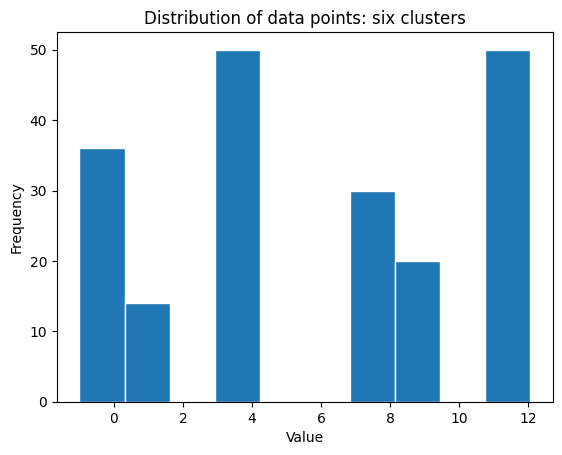

In [19]:
c_std = []
for i in range(6):
    c_std.append(np.random.rand())
    
# create points whose values are set between -1 and 1 at random - Pearson correlation coefficient
x = []
np.random.seed(10)
for i in range(50):
    x.append(round(rd.normal(loc=0, scale=c_std[0]),5))
    x.append(round(rd.normal(loc=4, scale=c_std[1]),5))
    x.append(round(rd.normal(loc=8, scale=c_std[0]),5))
    x.append(round(rd.normal(loc=12, scale=c_std[1]),5))

print(c_std)

plt.hist(x, edgecolor='white')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of data points: six clusters')
plt.show()

In [32]:
# To calculate weights according to the Gaussian similarity function
# transversing the upper triangular part of x_df is just enought
gaussian_weights = []
for i in range(200):
    for j in range(200):
        gaussian_weights.append(round(math.exp(-math.pow(x[i]-x[j],2)),5))
# for i in range(100):
#     gaussian_weights[101*i] = 0
S = np.array(gaussian_weights).reshape(200,200)
S = pd.DataFrame(S)
S

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.00000,0.00001,0.00000,0.00000,0.90856,0.00001,0.00000,0.00000,0.71542,0.00001,...,0.00000,0.00000,0.33113,0.00001,0.00000,0.00000,0.97229,0.00001,0.00000,0.00000
1,0.00001,1.00000,0.00002,0.00000,0.00000,0.99862,0.00000,0.00000,0.00000,0.99947,...,0.00000,0.00000,0.00000,0.99953,0.00000,0.00000,0.00000,0.99797,0.00000,0.00000
2,0.00000,0.00002,1.00000,0.00000,0.00000,0.00001,0.53612,0.00000,0.00000,0.00002,...,0.50388,0.00000,0.00000,0.00002,0.77621,0.00000,0.00000,0.00001,0.24692,0.00000
3,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.99999,0.00000,0.00000,...,0.00000,0.99997,0.00000,0.00000,0.00000,0.99893,0.00000,0.00000,0.00001,0.99979
4,0.90856,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.93018,0.00000,...,0.00000,0.00000,0.57693,0.00000,0.00000,0.00000,0.98003,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.00000,0.00000,0.00000,0.99893,0.00000,0.00000,0.00000,0.99912,0.00000,0.00000,...,0.00000,0.99856,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.99776
196,0.97229,0.00000,0.00000,0.00000,0.98003,0.00000,0.00000,0.00000,0.84453,0.00000,...,0.00000,0.00000,0.45800,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
197,0.00001,0.99797,0.00001,0.00000,0.00000,0.99994,0.00000,0.00000,0.00000,0.99952,...,0.00000,0.00000,0.00000,0.99946,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
198,0.00000,0.00000,0.24692,0.00001,0.00000,0.00000,0.85681,0.00000,0.00000,0.00000,...,0.88174,0.00001,0.00000,0.00000,0.63033,0.00000,0.00000,0.00000,1.00000,0.00001


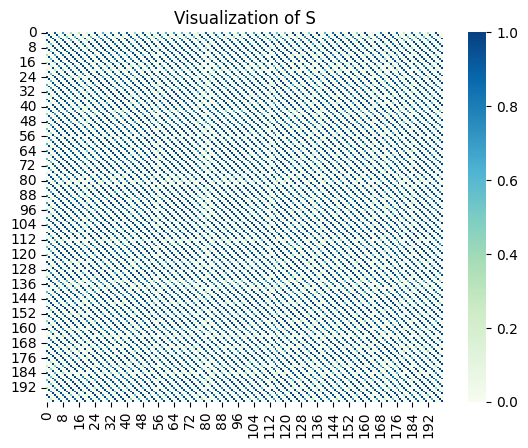

1.0


In [43]:
sns.heatmap(S, cmap=plt.cm.GnBu)
plt.title('Visualization of S')
plt.show() # quite sparse!

print(S.max().max())

In [34]:
for i in range(100):
    c_temp = S[i].value_counts()[0]
    if c_temp !=1:
        print('columns having more than one zero value detected')
        break

columns having more than one zero value detected


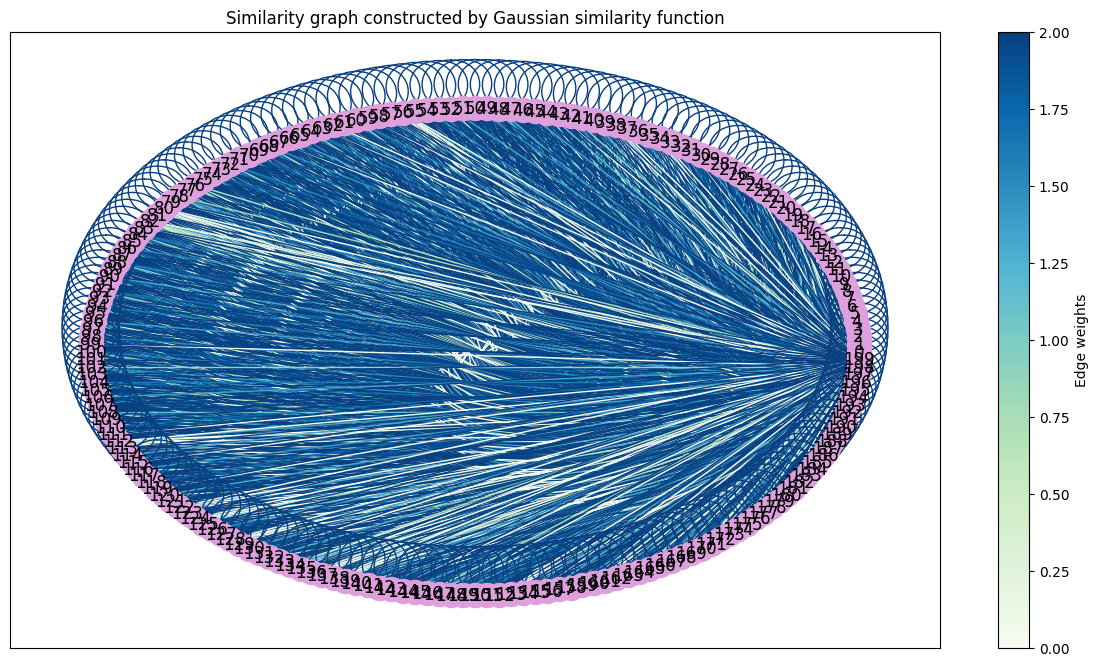

In [35]:
# from df to G
G = nx.from_pandas_adjacency(S)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
fig, axs = plt.subplots(figsize=(15,8))
nx.draw_networkx(G, ax=axs, pos=nx.circular_layout(G), node_color='plum', edgelist=edges, edge_color=weights, edge_cmap=plt.cm.GnBu)
norm2 = mpl.colors.Normalize(vmin=0, vmax=2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=plt.cm.GnBu),
             ax=axs, orientation='vertical', label='Edge weights')
plt.title('Similarity graph constructed by Gaussian similarity function')
plt.show()

In [44]:
d = np.ones(200)
D = np.diag(d)
D

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

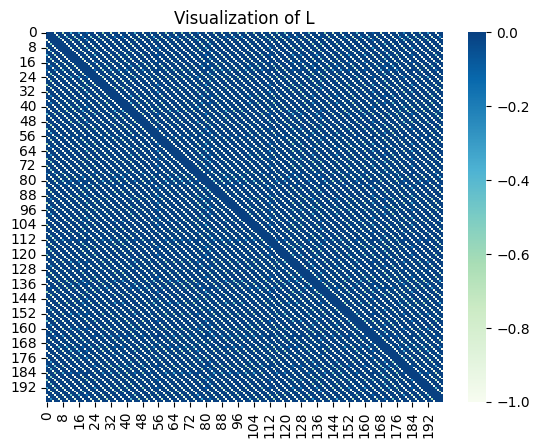

In [49]:
# normalized Laplacian matrix
L = D - S
pd.DataFrame(L)

sns.heatmap(L, cmap=plt.cm.GnBu)
plt.title('Visualization of L')
plt.show()

[6.66133815e-16 8.75433203e-01 1.00152378e+00 1.01084944e+00
 1.01084992e+00]
100 100


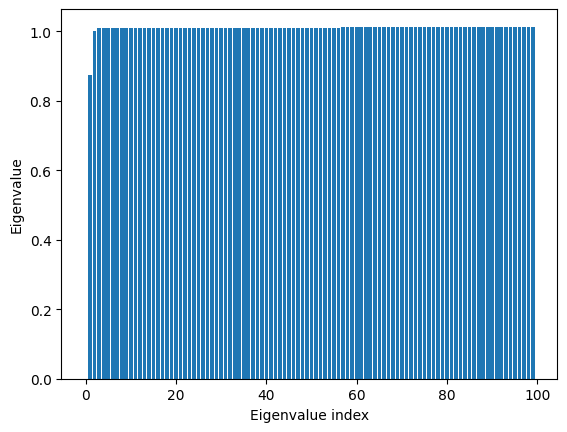

[-3.44569551e-125  6.93381295e+001  7.43307335e+001  7.52280752e+001
  7.58713938e+001]
100 100


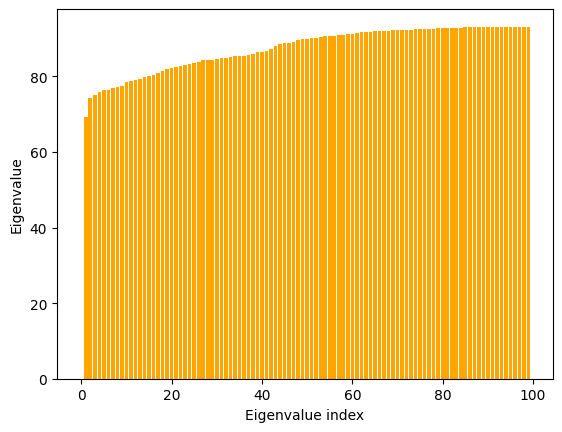

In [8]:
# eigenvalues of L calculated by NetworkX
L_spectrum = nx.normalized_laplacian_spectrum(G) # in the ascending order
print(L_spectrum[:5])
print(len(L_spectrum), len(np.array(np.unique(L_spectrum)))) # multiplicity check
plt.bar(range(len(L_spectrum)), L_spectrum)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.show()

L_spectrum_unn = nx.laplacian_spectrum(G) # unnormalized
print(L_spectrum_unn[:5])
print(len(L_spectrum_unn), len(np.array(np.unique(L_spectrum_unn))))
plt.bar(range(len(L_spectrum_unn)), L_spectrum_unn, color='orange')
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.show()

# note that eigenvalues of the unnormalized Laplacian are quite high
# note that the first eigenvalue approximates zero

In [9]:
L = nx.laplacian_matrix(G).toarray()
pd.DataFrame(L)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,91.521547,-0.979895,-0.999955,-0.875074,-0.943155,-0.938382,-0.993287,-0.844455,-0.997429,-0.942372,...,-0.993296,-0.987981,-0.971423,-0.977467,-0.999817,-0.998929,-0.993379,-0.848304,-0.983228,-0.853997
1,-0.979895,91.950903,-0.977985,-0.951576,-0.862614,-0.855741,-0.950813,-0.930365,-0.991612,-0.989828,...,-0.996347,-0.998941,-0.999230,-0.999929,-0.975944,-0.988021,-0.996285,-0.933123,-0.999845,-0.747237
2,-0.999955,-0.977985,91.421736,-0.870769,-0.946170,-0.941511,-0.994334,-0.839786,-0.996708,-0.939263,...,-0.992162,-0.986485,-0.969170,-0.975451,-0.999953,-0.998447,-0.992252,-0.843676,-0.981475,-0.858509
3,-0.875074,-0.951576,-0.870769,86.262996,-0.691619,-0.682977,-0.818613,-0.997898,-0.905783,-0.985304,...,-0.922884,-0.936880,-0.962677,-0.955099,-0.866306,-0.895295,-0.922617,-0.998377,-0.946162,-0.559043
4,-0.943155,-0.862614,-0.946170,-0.691619,83.712942,-0.999895,-0.974772,-0.652771,-0.917920,-0.789972,...,-0.900384,-0.883539,-0.843748,-0.856964,-0.949177,-0.927340,-0.900681,-0.657515,-0.870781,-0.976153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.998929,-0.988021,-0.998447,-0.895295,-0.927340,-0.922027,-0.986906,-0.866568,-0.999676,-0.956498,...,-0.997574,-0.994054,-0.981261,-0.986119,-0.997862,91.907983,-0.997624,-0.870200,-0.990573,-0.831179
96,-0.993379,-0.996285,-0.992252,-0.922617,-0.900681,-0.894625,-0.973597,-0.897018,-0.999053,-0.974059,...,-1.000000,-0.999191,-0.992152,-0.995187,-0.991008,-0.997624,92.166262,-0.900288,-0.997646,-0.795144
97,-0.848304,-0.933123,-0.843676,-0.998377,-0.657515,-0.648761,-0.788338,-0.999969,-0.881672,-0.974105,...,-0.900585,-0.916305,-0.946124,-0.937216,-0.838889,-0.870200,-0.900288,84.483101,-0.926883,-0.524862
98,-0.983228,-0.999845,-0.981475,-0.946162,-0.870781,-0.864064,-0.956000,-0.924015,-0.993728,-0.987184,...,-0.997695,-0.999596,-0.998384,-0.999563,-0.979594,-0.990573,-0.997646,-0.926883,92.043463,-0.757237


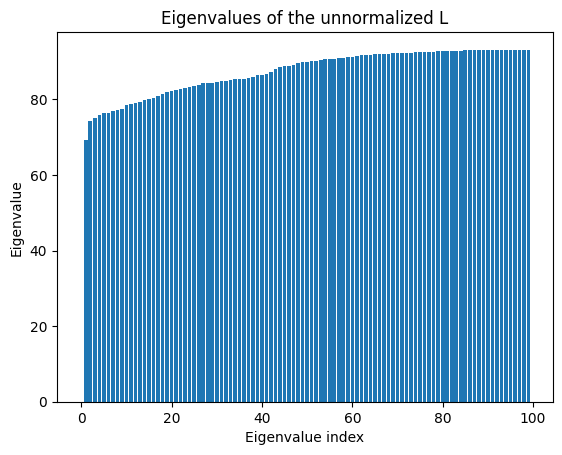

smallest : [-1.6142553339482292e-14, 69.33812948763077, 74.33073346673464]
largest : [93.15975909667424, 93.16660758883373, 93.17066703076839]
# of unique eigenvalues : 100 out of 100


In [10]:
# eigenvalues and vectors calculated by numpy
L_value, L_vector = np.linalg.eigh(L)

# plt.bar(range(len(L_value)), sorted(L_value))
plt.bar(range(len(L_value)), L_value)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the unnormalized L')
plt.show()

print('smallest :', sorted(L_value)[:3])
print('largest :', sorted(L_value)[-3:])
print('# of unique eigenvalues :', len(np.array(np.unique(L_value))), 'out of', len(L_value), ) # multiplicity check
# both give the same results

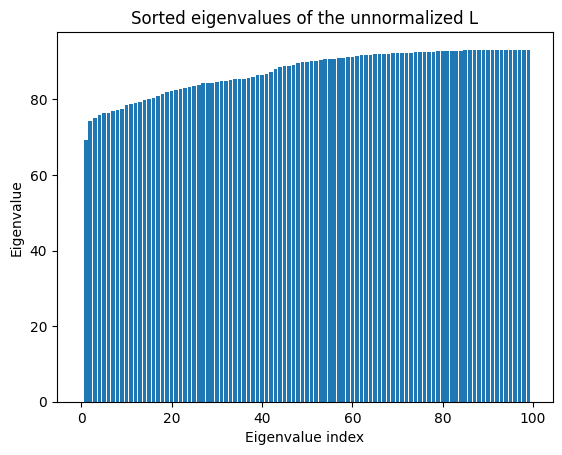

smallest : [-1.6142553339482292e-14, 69.33812948763077, 74.33073346673464]
largest : [93.15975909667424, 93.16660758883373, 93.17066703076839]


In [11]:
plt.bar(range(len(L_value)), sorted(L_value))
# plt.bar(range(len(L_value)), L_value)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('Sorted eigenvalues of the unnormalized L')
plt.show()

print('smallest :', sorted(L_value)[:3])
print('largest :', sorted(L_value)[-3:])

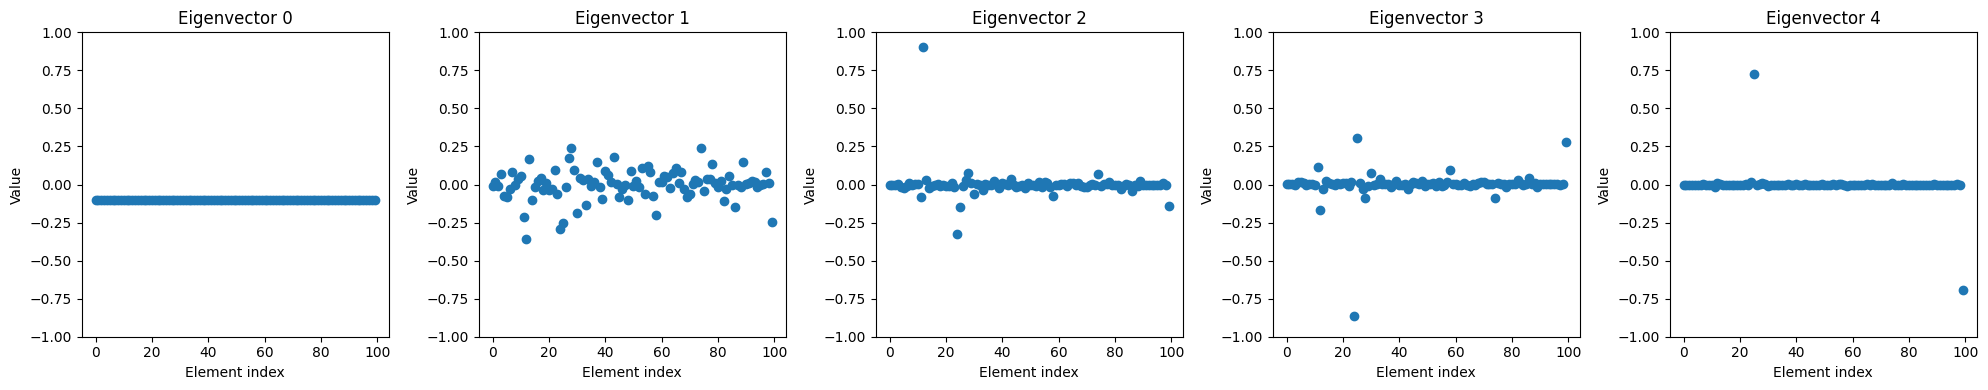

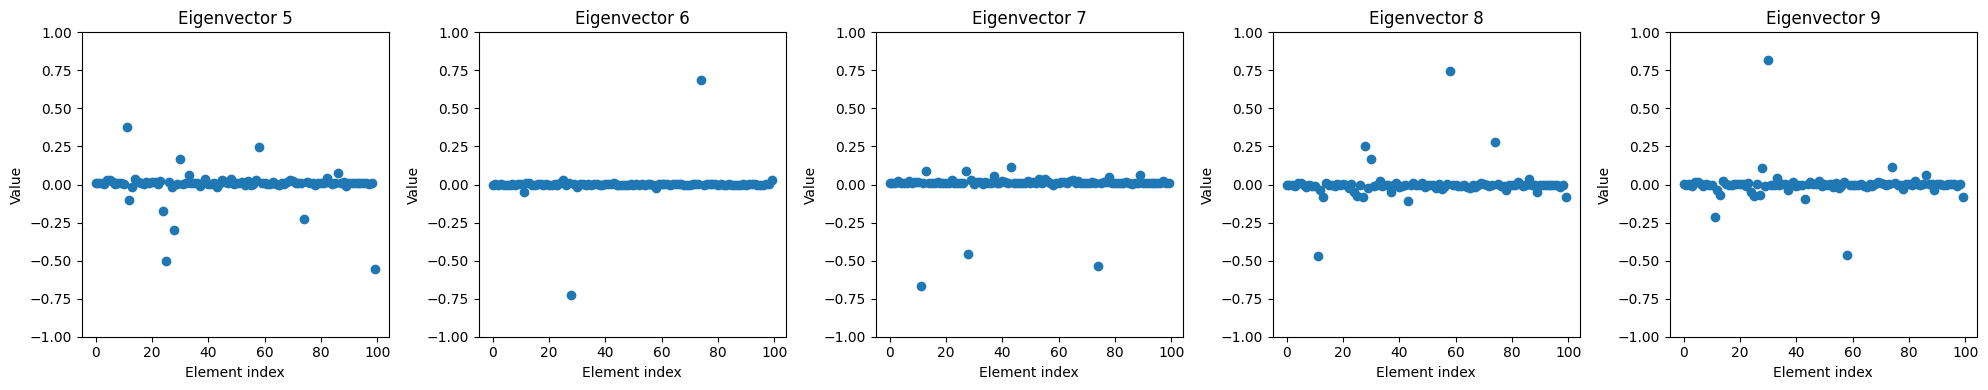

[-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1]


In [12]:
# visualize its eigenvectors
# Specify the number of plots per row
plots_per_row = 5
total_plots = 10

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue
        
        # plot data
        temp_vector = L_vector[:,run_number-1]
        # axes[col].scatter(x, temp_vector)
        axes[col].scatter(range(len(temp_vector)), temp_vector)
        axes[col].set_ylim(-1,1)
        axes[col].set_xlabel('Element index')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Eigenvector {run_number-1}')

    plt.tight_layout()
    plt.show()

print(L_vector[:,0]) # unit vector

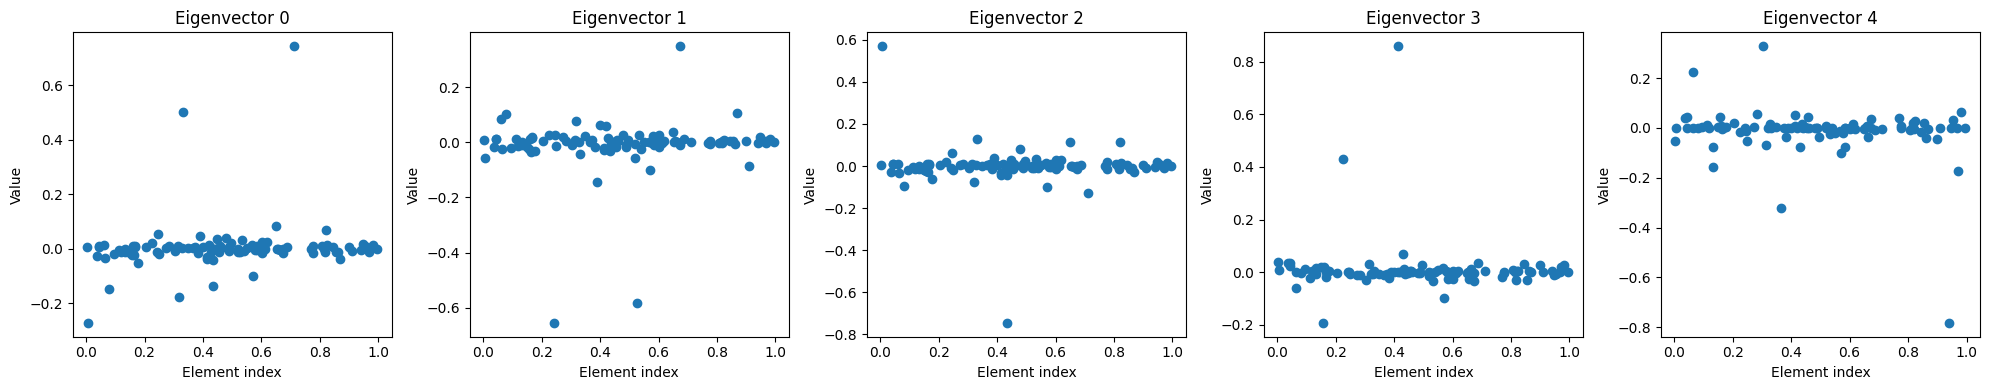

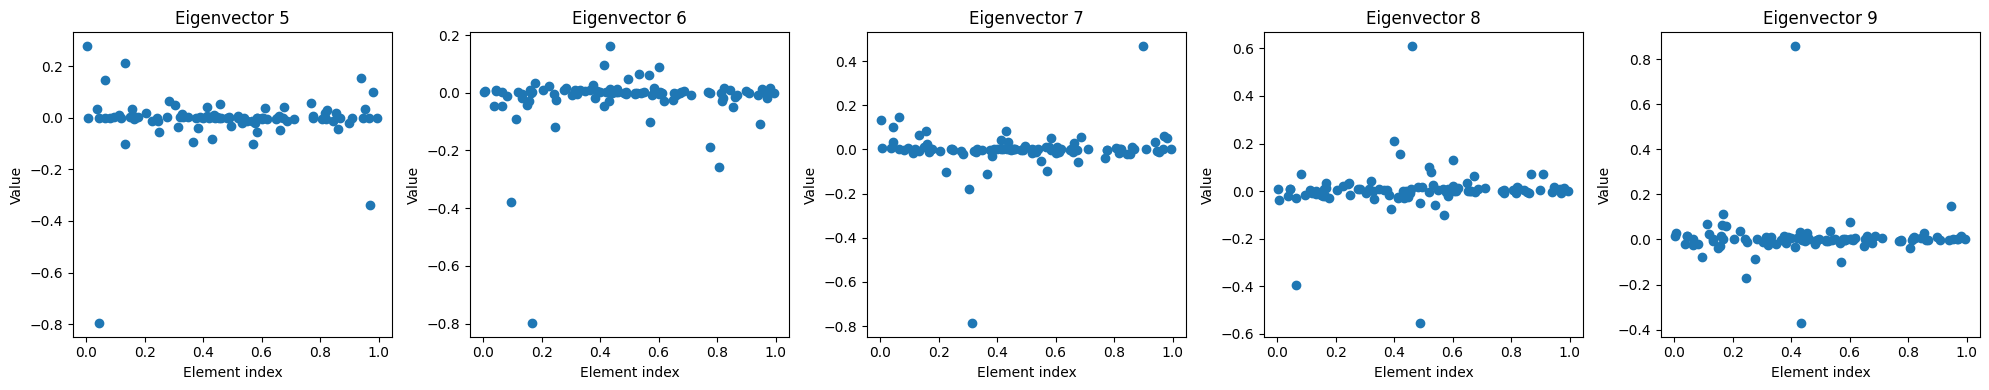

In [13]:
# visualize its eigenvectors
# Specify the number of plots per row
plots_per_row = 5
total_plots = 10

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue
        
        # plot data
        temp_vector = L_vector[run_number-1]
        axes[col].scatter(x, temp_vector)
        # axes[col].scatter(range(len(temp_vector)), temp_vector)
        axes[col].set_xlabel('Element index')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Eigenvector {run_number-1}')

    plt.tight_layout()
    plt.show()

# not the identity matrix! -> it might not concern the generalized eigenvalue problem

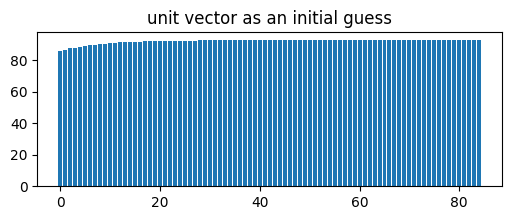

[92.942, 92.945, 92.947]
85 85


In [14]:
# 1. power method
# L = nx.normalized_laplacian_matrix(G).toarray()
L = nx.laplacian_matrix(G).toarray()

x0 = np.transpose(0.1*np.ones(100)) # initial guess
xk = 0 # initial guess multiplied by L k times
labmda_history = []

k = 85 # total number of iterations
x_target = [i/sum(x0) for i in x0] # normalized x0
for i in range(1, k+1):
    xk = np.matmul(L, x_target)
    labmda_history.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
    x_target = xk

plt.figure(figsize=(6,2))
plt.bar(range(len(labmda_history)), labmda_history)
plt.title('unit vector as an initial guess')
plt.show()
print(labmda_history[-3:])
print(len(labmda_history), len(np.array(np.unique(labmda_history)))) # multiplicity check

##################################################################################################################

# x0 = []
# random.seed(10)
# for i in range(100):
#     x0.append(round(random.uniform(0.1,1), 1))
# x0 = np.transpose(0.1*np.ones(100)) # initial guess
# xk = 0 # initial guess multiplied by L k times
# labmda_history = []

# k = 70 # total number of iterations
# x_target = [i/sum(x0) for i in x0] # normalized x0
# for i in range(1, k+1):
#     xk = np.matmul(L, x_target)
#     labmda_history.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
#     x_target = xk

# plt.figure(figsize=(6,2))
# plt.bar(range(len(labmda_history)), labmda_history)
# plt.title('random vector as an initial guess')
# plt.show()

# print(labmda_history[:5])
# print(labmda_history[-5:])
# print(len(labmda_history), len(np.array(np.unique(labmda_history)))) # multiplicity check

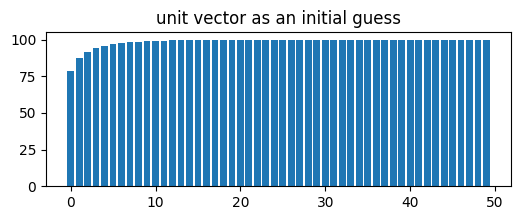

[100.0, 100.0, 100.0]
50 38


In [66]:
# 1. power method
# with the test array
L = test

x0 = np.transpose(0.1*np.ones(10)) # initial guess; dimension changed
xk = 0 # initial guess multiplied by L k times
labmda_history = []

k = 50 # total number of iterations
x_target = [i/sum(x0) for i in x0] # normalized x0
for i in range(1, k+1):
    xk = np.matmul(L, x_target)
    labmda_history.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
    x_target = xk

plt.figure(figsize=(6,2))
plt.bar(range(len(labmda_history)), labmda_history)
plt.title('unit vector as an initial guess')
plt.show()
print(labmda_history[-3:])
print(len(labmda_history), len(np.array(np.unique(labmda_history)))) # multiplicity check

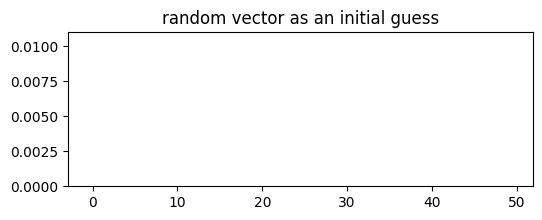

[0.0, 0.0, 0.0]

In [15]:
# 2. inverse power method
# x0 = []
# random.seed(10)
# for i in range(100):
#     x0.append(round(random.uniform(0.1,1), 1))

x0 = np.transpose(0.1*np.ones(100)) # initial guess
xk = 0 # initial guess multiplied by L k times
labmda_history = []

k = 50 # total number of iterations
x_target = [i/sum(x0) for i in x0] # normalized x0
for i in range(1, k+1):
    xk = np.matmul(np.linalg.inv(L), x_target)
    labmda_history.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
    x_target = xk/xk.sum()

plt.figure(figsize=(6,2))
plt.bar(range(len(labmda_history)), labmda_history)
plt.ylim(0,0.011)
plt.title('random vector as an initial guess')
plt.show()

labmda_history[-3:]

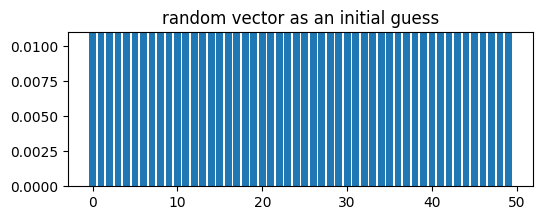

[1.0, 1.0, 1.0]

In [67]:
# 2. inverse power method
L = test

x0 = np.transpose(0.1*np.ones(10)) # initial guess
xk = 0 # initial guess multiplied by L k times
labmda_history = []

k = 50 # total number of iterations
x_target = [i/sum(x0) for i in x0] # normalized x0
for i in range(1, k+1):
    xk = np.matmul(np.linalg.inv(L), x_target)
    labmda_history.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
    x_target = xk/xk.sum()

plt.figure(figsize=(6,2))
plt.bar(range(len(labmda_history)), labmda_history)
plt.ylim(0,0.011)
plt.title('random vector as an initial guess')
plt.show()

labmda_history[-3:]

In [16]:
# code from https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_LU.html is a bit modified
def plu_inverse(A):
    
    n = A.shape[0]
    
    b = np.eye(n)
    Ainv = np.zeros((n, n))
    
    P, L, U = linalg.lu(A)
    
    for i in range(n):
        
        y = forward_substitution(L, np.dot(P, b[i, :]))
        
        Ainv[i, :] = back_substitution(U, y)
        
    return Ainv

def forward_substitution(L, b):
    
    #Get number of rows
    n = L.shape[0]
    
    #Allocating space for the solution vector
    y = np.zeros_like(b, dtype=np.double);
    
    #Here we perform the forward-substitution.  
    #Initializing  with the first row.
    y[0] = b[0] / L[0, 0]
    
    #Looping over rows in reverse (from the bottom  up),
    #starting with the second to last row, because  the 
    #last row solve was completed in the last step.
    for i in range(1, n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i])) / L[i,i]
        
    return y

def back_substitution(U, y):
    
    #Number of rows
    n = U.shape[0]
    
    #Allocating space for the solution vector
    x = np.zeros_like(y, dtype=np.double);

    #Here we perform the back-substitution.  
    #Initializing with the last row.
    x[-1] = y[-1] / U[-1, -1]
    
    #Looping over rows in reverse (from the bottom up), 
    #starting with the second to last row, because the 
    #last row solve was completed in the last step.
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i:], x[i:])) / U[i,i]
        
    return x
    
plu_inverse(L) # why are elements this high?

array([[7.03687442e+12, 7.03687442e+12, 7.03687442e+12, ...,
        7.03687442e+12, 7.03687442e+12, 7.03687442e+12],
       [7.03687442e+12, 7.03687442e+12, 7.03687442e+12, ...,
        7.03687442e+12, 7.03687442e+12, 7.03687442e+12],
       [7.03687442e+12, 7.03687442e+12, 7.03687442e+12, ...,
        7.03687442e+12, 7.03687442e+12, 7.03687442e+12],
       ...,
       [7.03687442e+12, 7.03687442e+12, 7.03687442e+12, ...,
        7.03687442e+12, 7.03687442e+12, 7.03687442e+12],
       [7.03687442e+12, 7.03687442e+12, 7.03687442e+12, ...,
        7.03687442e+12, 7.03687442e+12, 7.03687442e+12],
       [7.03687442e+12, 7.03687442e+12, 7.03687442e+12, ...,
        7.03687442e+12, 7.03687442e+12, 7.03687442e+12]])

In [17]:
def forward_substitution(L, b):
    n = L.shape[0]
    y = np.zeros_like(b, dtype=np.double);
    y[0] = b[0] / L[0, 0]
    for i in range(1, n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i])) / L[i,i]
    return y

def back_substitution(U, y):
    n = U.shape[0]
    x = np.zeros_like(y, dtype=np.double);
    x[-1] = y[-1] / U[-1, -1]
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i:], x[i:])) / U[i,i]
    return x

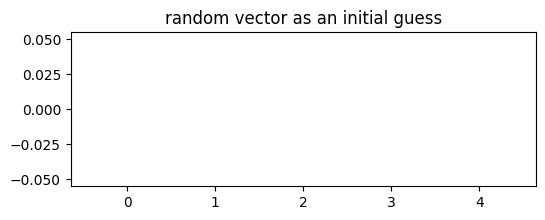

-0.0

In [18]:
# 3. get the inverse of L with LU factorization

x0 = []
random.seed(10)
for i in range(100):
    x0.append(round(random.uniform(0.1,1), 1))
xk = 0 # initial guess multiplied by L k times
labmda_history = []

k = 5 # total number of iterations
x_target = [i/sum(x0) for i in x0]
for i in range(1, k+1):
    normalized_inverse_L = plu_inverse(L)
    xk = np.matmul(normalized_inverse_L, x_target)
    labmda_history.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
    x_target = xk/xk.sum()

plt.figure(figsize=(6,2))
plt.bar(range(len(labmda_history)), labmda_history)
plt.title('random vector as an initial guess')
plt.show()

labmda_history[-1]

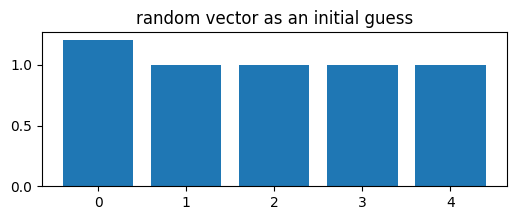

1.0

In [69]:
# 3. get the inverse of L with LU factorization
L = test

x0 = []
random.seed(10)
for i in range(10):
    x0.append(round(random.uniform(0.1,1), 1))
xk = 0 # initial guess multiplied by L k times
labmda_history = []

k = 5 # total number of iterations
x_target = [i/sum(x0) for i in x0]
for i in range(1, k+1):
    normalized_inverse_L = plu_inverse(L)
    xk = np.matmul(normalized_inverse_L, x_target)
    labmda_history.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
    x_target = xk/xk.sum()

plt.figure(figsize=(6,2))
plt.bar(range(len(labmda_history)), labmda_history)
plt.title('random vector as an initial guess')
plt.show()

labmda_history[-1]

In [19]:
import numpy as np
a = np.array((1,2,3))
b = np.array((2,3,4))
c = np.array((3,4,5))
test_list = [a,b,c]
np.column_stack(test_list)

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [20]:
float(3)

3.0

In [156]:
# 4. new deflation method
# with the simpler example

L = test

labmda_history = []

k = 70 # total number of iterations for power method

# store eigenvalue sand vectors found by iterations
xk_num = 5 # number of eigenvectors you wish to get
xk_vals = []
xk_vecs = []

for j in range(1, xk_num+1): # repeat these procedures until you get certain number of eigenvectors
    # initial guess
    v0 = np.transpose(0.1*np.ones(5)) # initial guess
    v0 = [i/sum(v0) for i in v0] # normalized
    vk = v0 # initial guess multiplied by L k times
    
    labmda_history_elem = [] # initialize an array
    poj = 0
    
    # projection
    print(f'====={j}-th iteration=====')
    if j==1: # first iteration - no projection
        pass
    elif j==2: # column space consists of only one col vector; no need for stacking
        vk = vk - np.dot((np.matmul(xk_vecs[0], vk)/np.matmul(xk_vecs[0], xk_vecs[0])),xk_vecs[0])
    else:
        try:
            # check whether vectors are linearly independent
            A = np.column_stack(xk_vecs) # column space
            print(f'{np.matmul(np.transpose(A), A)}')
            # vk = vk - np.matmul(A, np.matmul(np.linalg.inv(np.dot(np.transpose(A), A)), np.dot(np.transpose(A), vk)))
            for k in range(len(xk_vecs)):
                proj += np.dot((np.matmul(xk_vecs[k], vk)/np.matmul(xk_vecs[k], xk_vecs[k])),xk_vecs[k])
            vk = vk - proj
             # indices of the pivot columns, linearly dependent?
        except:
            print(f'error at {j}-th iteration')
            pass
    
    # iteration for power method
    for i in range(1, k+1):
        vk = np.matmul(L, vk)
        labmda_history_elem.append(np.round(np.matmul(np.matmul(L, vk), vk) / np.matmul(vk,vk), 10)) # Rayleigh quotient
    print(f'eigen vectors : {vk}')
    # store results and go to find the next eigenvector
    # print(f'At {j}-th iteration : {labmda_history_elem[-1]}')
    
    if len(labmda_history_elem)>0:
        xk_vals.append(labmda_history_elem[-1]) # converged value
    # xk_vecs.append([i/sum(vk) for i in vk]) # normalized vector
    xk_vecs.append(vk)
    labmda_history.append(labmda_history_elem)
    
# print(len(labmda_history[-1]), len(np.array(np.unique(labmda_history[-1])))) # multiplicity check
print(xk_vals)

=====1-th iteration=====
eig_vec : [2.00000000e-01 2.87007203e+58 1.89262537e+77 6.51301476e+88
 1.43492963e+97]
=====2-th iteration=====
eig_vec : [ 2.00000000e-01  2.87007203e+58  1.89262537e+77  6.51301473e+88
 -6.51301476e+88]
=====3-th iteration=====
[[ 2.05902304e+194 -9.34571780e+185]
 [-9.34571780e+185  8.48387221e+177]]
error at 3-th iteration
eig_vec : [0.2, 0.2, 0.2, 0.2, 0.2]
=====4-th iteration=====
[[ 2.05902304e+194 -9.34571780e+185  2.86985927e+096]
 [-9.34571780e+185  8.48387221e+177 -5.90114202e+079]
 [ 2.86985927e+096 -5.90114202e+079  2.00000000e-001]]
error at 4-th iteration
eig_vec : [0.2, 0.2, 0.2, 0.2, 0.2]
=====5-th iteration=====
[[ 2.05902304e+194 -9.34571780e+185  2.86985927e+096  2.86985927e+096]
 [-9.34571780e+185  8.48387221e+177 -5.90114202e+079 -5.90114202e+079]
 [ 2.86985927e+096 -5.90114202e+079  2.00000000e-001  2.00000000e-001]
 [ 2.86985927e+096 -5.90114202e+079  2.00000000e-001  2.00000000e-001]]
error at 5-th iteration
eig_vec : [0.2, 0.2, 0.2, 0

In [25]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.column_stack((a,b))

array([[1, 2],
       [2, 3],
       [3, 4]])

In [90]:
from sympy import Matrix

# Define your augmented matrix
A_augmented = Matrix([[2, 1, 0], [1, -6, 0]])

# Perform row reduction
reduced_matrix = A_augmented.rref()

reduced_matrix[1]==(0,1)
# The first is the reduced row echelon form, and the second is a tuple of indices of the pivot columns.

True

range(0, 1)

In [32]:
Matrix.ones(2,2)

Matrix([
[1, 1],
[1, 1]])

In [42]:
# 5. inverse deflation method
# add codes to check whether column vectors are linear dependent

labmda_history = []

k = 10 # total number of iterations for power method

# store eigenvalue sand vectors found by iterations
xk_num = 10 # number of eigenvectors you wish to get
xk_vals = []
xk_vecs = []

v_target = [i/sum(x0) for i in x0] # normalized x0; target of L

print('Eigenvalues found :')
for j in range(1, xk_num+1): # repeat these procedures until you get certain number of eigenvectors
    # initial guess
    v0 = np.transpose(0.1*np.ones(100)) # initial guess
    v0 = [i/sum(v0) for i in v0] # normalized
    vk = v0 # initial guess multiplied by L k times
    labmda_history_elem = [] # initialize an array
    
    # projection
    if j==1: # first iteration
        pass
    elif j==2: # column space consists of only one col vector; no need for stacking
        vk = vk - np.dot(np.matmul(xk_vecs[0], vk)/np.matmul(vk, vk),vk)
    else:
        A = np.column_stack(xk_vecs) # column space
        
        try:
            vk = vk - np.matmul(A, np.matmul(np.linalg.inv(np.dot(np.transpose(A), A)), np.dot(np.transpose(A), vk)))
        except:
            print('column vectors compose a singular matrix')
    
    # iteration for inverse power method
    for i in range(1, k+1):
        vk = np.matmul(plu_inverse(L), vk)
        labmda_history_elem.append(np.round(np.matmul(np.matmul(L, vk), vk) / np.matmul(vk,vk), 10)) # Rayleigh quotient

    # store results and go to find the next eigenvector
    print(f'At {j}-th iteration : {labmda_history_elem[-1]}')
    xk_vals.append(labmda_history_elem[-1]) # converged value
    xk_vecs.append([i/sum(vk) for i in vk]) # normalized vector
    labmda_history.append(labmda_history_elem)
    
print(len(labmda_history[-1]), len(np.array(np.unique(labmda_history[-1])))) # multiplicity check

Eigenvalues found :
At 1-th iteration : -0.0
At 2-th iteration : 0.0
At 3-th iteration : 0.0
At 4-th iteration : -0.0
At 5-th iteration : -0.0
At 6-th iteration : 0.0
At 7-th iteration : -0.0
At 8-th iteration : 0.0
At 9-th iteration : 0.0
At 10-th iteration : -0.0
10 1


In [108]:
# Define your augmented matrix
A_augmented = Matrix(xk_vecs)
A_augmented.rref()[1] # indices of the pivot columns, linearly dependent?

(0, 1, 2)

In [112]:
A_augmented.rref()[1] ==  tuple(range(3))

True

In [133]:
# do with a manifest example
test = np.arange(1,26).reshape(5,5)
test = np.diag(np.diag(test))
test

array([[ 1,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0, 13,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 25]])

In [134]:
np.linalg.inv(test)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.07692308, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.05263158, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.04      ]])

In [136]:
np.linalg.eig(test)

EigResult(eigenvalues=array([ 1.,  7., 13., 19., 25.]), eigenvectors=array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]]))

In [138]:
# Define your augmented matrix
len(Matrix(test).rref()[1]) # indices of the pivot columns, linearly dependent?

5

In [48]:
# 5. inverse deflation method
# with the simpler example
A = test

labmda_history = []

k = 10 # total number of iterations for power method

# store eigenvalue sand vectors found by iterations
xk_num = 10 # number of eigenvectors you wish to get
xk_vals = []
xk_vecs = []

v_target = [i/sum(x0) for i in x0] # normalized x0; target of L

print('Eigenvalues found :')
for j in range(1, xk_num+1): # repeat these procedures until you get certain number of eigenvectors
    # initial guess
    v0 = np.transpose(0.1*np.ones(100)) # initial guess
    v0 = [i/sum(v0) for i in v0] # normalized
    vk = v0 # initial guess multiplied by L k times
    labmda_history_elem = [] # initialize an array
    
    # projection
    if j==1: # first iteration
        pass
    elif j==2: # column space consists of only one col vector; no need for stacking
        vk = vk - np.dot(np.matmul(xk_vecs[0], vk)/np.matmul(vk, vk),vk)
    else:
        A = np.column_stack(xk_vecs) # column space
        
        try:
            vk = vk - np.matmul(A, np.matmul(np.linalg.inv(np.dot(np.transpose(A), A)), np.dot(np.transpose(A), vk)))
        except:
            print('column vectors compose a singular matrix')
    
    # iteration for inverse power method
    for i in range(1, k+1):
        vk = np.matmul(plu_inverse(L), vk)
        labmda_history_elem.append(np.round(np.matmul(np.matmul(L, vk), vk) / np.matmul(vk,vk), 10)) # Rayleigh quotient

    # store results and go to find the next eigenvector
    print(f'At {j}-th iteration : {labmda_history_elem[-1]}')
    xk_vals.append(labmda_history_elem[-1]) # converged value
    xk_vecs.append([i/sum(vk) for i in vk]) # normalized vector
    labmda_history.append(labmda_history_elem)
    
print(len(labmda_history[-1]), len(np.array(np.unique(labmda_history[-1])))) # multiplicity check

Eigenvalues found :
At 1-th iteration : -0.0
At 2-th iteration : 0.0
At 3-th iteration : 0.0
At 4-th iteration : -0.0
At 5-th iteration : -0.0
At 6-th iteration : 0.0
At 7-th iteration : -0.0
At 8-th iteration : 0.0
At 9-th iteration : 0.0
At 10-th iteration : -0.0
10 1
